### Project 2 - IE6400 Foundations of Data Analytics - Group 8


Team members:

Jaamie Maarsh Joy Martin joymartin.j@northeastern.edu +1 (206)-356-0024

Wenbo Zhu zhu.wenbo@northeastern.edu +1 (678)-873-3680

Kalyan Kumar Chenchu Malakondaiah chenchumalakondaia.k@northeastern.edu +1 (206)-679-0953

In [1]:
#Installing all the necessary packages
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install pyts

  Using cached pycairo-1.25.1.tar.gz (347 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/cairo
      copying cairo/__init__.py -> build/lib.macosx-11.1-arm64-cpython-311/cairo
      copying cairo/__init__.pyi -> build/lib.macosx-11.1-arm64-cpython-311/cairo
      copying cairo/py.typed -> build/lib.macosx-11.1-arm64-cpython-311/cairo
      running build_ext
      'pkg-config' not found.
      Command ['pkg-config', '--print-errors', '--exists', 'cairo >= 1.15.10']
      [end of output]
  
  note: This

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import itertools
import numpy as np
import statsmodels.api as sm
import networkx as nx
import igraph as ig



# Commands for time series & Forcasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from ts2vg import HorizontalVG
from ts2vg import NaturalVG

# Evaluation metrics
from sklearn import metrics


#This command is to ignore all the warnings 
warnings.filterwarnings("ignore")

### Task 1

#### Task 1.1: Select a sample size of 1024 points (from 1000 to 2023) for each of your 2 subjects

In [25]:
# Loading the necessary datasets
data1 = pd.read_csv('acc_climbingdown_chest.csv')
data2 = pd.read_csv('acc_climbingup_chest.csv')
data3 = pd.read_csv('acc_running_chest.csv')
data4 = pd.read_csv('acc_walking_chest.csv')
data5 = pd.read_csv('acc3_climbingdown_chest.csv')
data6 = pd.read_csv('acc3_climbingup_chest.csv')
data7=pd.read_csv('acc3_running_chest.csv')
data8=pd.read_csv('acc3_walking_chest.csv')
s2_climbingdown = data1.iloc[999:2023]
s2_climbingup=data2.iloc[999:2023]
s2_running=data3.iloc[999:2023]
s2_walking=data4.iloc[999:2023]
s3_climbingdown=data5.iloc[999:2023]
s3_climbingup=data6.iloc[999:2023]
s3_running=data7.iloc[999:2023]
s3_walking=data8.iloc[999:2023]
warnings.filterwarnings("ignore")

In [7]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [28]:
!pip install pyts

In [29]:
s3_walking

,id,attr_time,attr_x,attr_y,attr_z
999,1000,1436182190015,-1.110910,10.763134,-1.255759
1000,1001,1436182190034,-0.423175,10.368689,-0.745195
1001,1002,1436182190054,0.098761,9.470863,-0.543484
1002,1003,1436182190075,0.319626,8.555679,-0.161609
1003,1004,1436182190097,0.292093,7.587824,0.182558
...,...,...,...,...,...
2018,2019,1436182210414,3.538630,10.356119,-3.415329
2019,2020,1436182210433,3.478177,9.170990,-2.846706
2020,2021,1436182210454,3.234567,9.014768,-1.768118
2021,2022,1436182210478,2.630629,9.448717,-1.178546


In [30]:
s2_climbingdown['Activity']= 'Climbingdown'
s2_climbingup['Activity'] = 'Climbingup'
s2_running['Activity'] = 'Running'
s2_walking['Activity'] = 'Walking'
s3_climbingdown['Activity'] = 'Climbingdown'
s3_climbingup['Activity'] = 'Climbingup'
s3_running['Activity'] = 'Running'
s3_walking['Activity'] = 'Walking'

In [31]:
s2_climbingdown['Subject']='Subject1'
s2_climbingup['Subject'] = 'Subject1'
s2_running['Subject'] = 'Subject1'
s2_walking['Subject'] = 'Subject1'
s3_climbingdown['Subject'] = 'Subject2'
s3_climbingup['Subject'] = 'Subject2'
s3_running['Subject'] = 'Subject2'
s3_walking['Subject'] = 'Subject2'

#### The below part has answers for the tasks 1.2 & 1.3

##### Task 1.2: Apply a natural visibility graph (NVG) and horizontal visibility graph (HVG) to each of the aforementioned data. You have 2 subjects, 3 accelerometer directions, and 4 activities for each, so you should end up with 48 graphs. You DO NOT have to display the graphs!!

#### Task 1.3: For each graph, compute the average degree, network diameter, and average path length

NVG
Two arbitrary data values $\left(t_{a}, y_{a}\right)$ and $\left(t_{b}, y_{b}\right)$ will have visibility, and consequently will become two connected nodes of the associated graph, if any other data $\left(t_{c}, y_{c}\right)$ placed between them fulfills:
$$
y_{c}<y_{b}+\left(y_{a}-y_{b}\right) \frac{t_{b}-t_{c}}{t_{b}-t_{a}} \text {. }
$$

#### analyzing temporal network of timeseries data by using NVG

In [32]:

g = NaturalVG()
g.build(s2_climbingup['attr_x'])
ig_g = g.as_igraph()
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 6096
Average Degree: 11.90625
Network Diameter: 10
Average Path Length: 4.2020577498778104


In [33]:
g = NaturalVG()
g.build(s2_climbingup['attr_y'])
ig_g = g.as_igraph()
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 7138
Average Degree: 13.94140625
Network Diameter: 9
Average Path Length: 4.867319235703812


In [34]:
g = NaturalVG()
g.build(s2_climbingup['attr_z'])
ig_g = g.as_igraph()
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 4318
Average Degree: 8.43359375
Average Degree: 8.43359375
Network Diameter: 16
Average Path Length: 5.020508767106549


In [47]:
g = NaturalVG()
g.build(s2_running['attr_x'])
ig_g = g.as_igraph()
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 4961
Average Degree: 9.689453125
Average Degree: 9.689453125
Network Diameter: 11
Average Path Length: 5.330576429618769


In [46]:
g = NaturalVG()
g.build(s2_running['attr_y'])
ig_g = g.as_igraph()
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 4868
Average Degree: 9.5078125
Average Degree: 9.5078125
Network Diameter: 253
Average Path Length: 86.24121952895895


In [45]:
g = NaturalVG()
g.build(s2_running['attr_z'])
ig_g = g.as_igraph()
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 3380
Average Degree: 6.6015625
Average Degree: 6.6015625
Network Diameter: 10
Average Path Length: 4.9171955186950145


 HVG
 The horizontal visibility algorithm maps time series into graphs and it is defined as follows. Let $\left\{x_{i}\right\}_{i=1 . . N}$ be a time series of $N$ data. The algorithm assigns each datum of the series to a node in the horizontal visibility graph (graph from now on). Two nodes $i$ and $j$ in the graph are connected if one can draw a horizontal line in the time series joining $x_{i}$ and $x_{j}$ that does not intersect any intermediate data height (see figure 2 for a graphical illustration). Hence, $i$ and $j$ are two connected nodes if the following geometrical criterion is fulfilled within the time series:
$x_{i}, x_{j}>x_{n}$ for all $n$ such that $i<n<j$

#### analyzing temporal network of timeseries data by using HVG

In [35]:
from ts2vg import HorizontalVG
import igraph as ig
g = HorizontalVG()
g.build(s3_walking['attr_x'])
ig_g = g.as_igraph()
ig.plot(ig_g)
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 2025
Average Degree: 3.955078125
Network Diameter: 28
Average Path Length: 12.87014868951613


In [36]:
g = HorizontalVG()
g.build(s3_walking['attr_y'])
ig_g = g.as_igraph()
ig.plot(ig_g)
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 2031
Average Degree: 3.966796875
Network Diameter: 30
Average Path Length: 13.828944052419354


In [37]:
g = HorizontalVG()
g.build(s3_walking['attr_z'])
ig_g = g.as_igraph()
ig.plot(ig_g)
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 2019
Average Degree: 3.943359375
Network Diameter: 26
Average Path Length: 8.449314210654936


In [42]:
g = HorizontalVG()
g.build(s3_running['attr_x'])
ig_g = g.as_igraph()
ig.plot(ig_g)
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 2028
Average Degree: 3.9609375
Network Diameter: 21
Average Path Length: 8.991154615713587


In [43]:
g = HorizontalVG()
g.build(s3_running['attr_y'])
ig_g = g.as_igraph()
ig.plot(ig_g)
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 1772
Average Degree: 3.4609375
Network Diameter: 276
Average Path Length: 91.5356144611437


In [44]:
g = HorizontalVG()
g.build(s3_running['attr_z'])
ig_g = g.as_igraph()
ig.plot(ig_g)
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 1024
Number of Links: 2036
Average Degree: 3.9765625
Network Diameter: 16
Average Path Length: 7.513009378054741


#### Task 1.4: Tabulate all the results based on the Sample Table Output shown in the question

In [38]:

import pandas as pd
import numpy as np
from ts2vg import NaturalVG, HorizontalVG
import igraph as ig

# creating an empty DataFrame
results_df = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer Axis', 'Activity', 'Average Degree', 'Network Diameter', 'Average Path Length'])


data = {
    'subject1': {
        'walking': {
            'x': s2_walking['attr_x'],
            'y': s2_walking['attr_y'],
            'z': s2_walking['attr_z']
        },
        'running': {
            'x': s2_running['attr_x'],
            'y': s2_running['attr_y'],
            'z': s2_running['attr_z']
        },
        'climbingdown': {
            'x': s2_climbingdown['attr_x'],
            'y': s2_climbingdown['attr_y'],
            'z': s2_climbingdown['attr_z']
        },
        'climbingup': {
            'x': s2_climbingup['attr_x'],
            'y': s2_climbingup['attr_y'],
            'z': s2_climbingup['attr_z']
        }

    },
    'subject2': {
        'walking': {
            'x': s3_walking['attr_x'],
            'y': s3_walking['attr_y'],
            'z': s3_walking['attr_z']
        },
        'running': {
            'x': s3_running['attr_x'],
            'y': s3_running['attr_y'],
            'z': s3_running['attr_z']
        },
        'climbingdown': {
            'x': s3_climbingdown['attr_x'],
            'y': s3_climbingdown['attr_y'],
            'z': s3_climbingdown['attr_z']
        },
        'climbingup': {
            'x': s3_climbingup['attr_x'],
            'y': s3_climbingup['attr_y'],
            'z': s3_climbingup['attr_z']
        }

    }
}

for subject in data:
    for activity in data[subject]:
            for axis in data[subject][activity]:

                # using NVG method
                g = NaturalVG()
                g.build(data[subject][activity][axis])
                ig_g = g.as_igraph()

                # summing up the NVG to the outcome of the DataFrame
                results_df = results_df.append({
                    'Method': 'NVG',
                    'Subject': subject,
                    'Accelerometer Axis': axis.upper(),
                    'Activity': activity.capitalize(),
                    'Average Degree': np.mean(ig_g.degree()),
                    'Network Diameter': ig_g.diameter(),
                    'Average Path Length': ig_g.average_path_length()
                }, ignore_index=True)

                # incorporating the HVG method
                g = HorizontalVG()
                g.build(data[subject][activity][axis])
                ig_g = g.as_igraph()

                # adding the HVG to the outcome of the DataFrame
                results_df = results_df.append({
                    'Method': 'HVG',
                    'Subject': subject,
                    'Accelerometer Axis': axis.upper(),
                    'Activity': activity.capitalize(),
                    'Average Degree': np.mean(ig_g.degree()),
                    'Network Diameter': ig_g.diameter(),
                    'Average Path Length': ig_g.average_path_length()
                }, ignore_index=True)


results_df

,Method,Subject,Accelerometer Axis,Activity,Average Degree,Network Diameter,Average Path Length
0,NVG,subject1,X,Walking,10.839844,12,4.571662
1,HVG,subject1,X,Walking,3.943359,26,10.559222
2,NVG,subject1,Y,Walking,14.841797,12,4.649472
3,HVG,subject1,Y,Walking,3.945312,32,12.656506
4,NVG,subject1,Z,Walking,9.103516,9,4.397867
5,HVG,subject1,Z,Walking,3.951172,25,8.450618
6,NVG,subject1,X,Running,9.689453,11,5.330576
7,HVG,subject1,X,Running,3.958984,21,8.860633
8,NVG,subject1,Y,Running,9.507812,253,86.241220
9,HVG,subject1,Y,Running,3.494141,259,89.085538


#### Task 1.5: Generate scatter plots of average degree vs network diameter and color the pointsaccording to walking and running (do this for each accelerometer signal and each method (NVG and HVG)

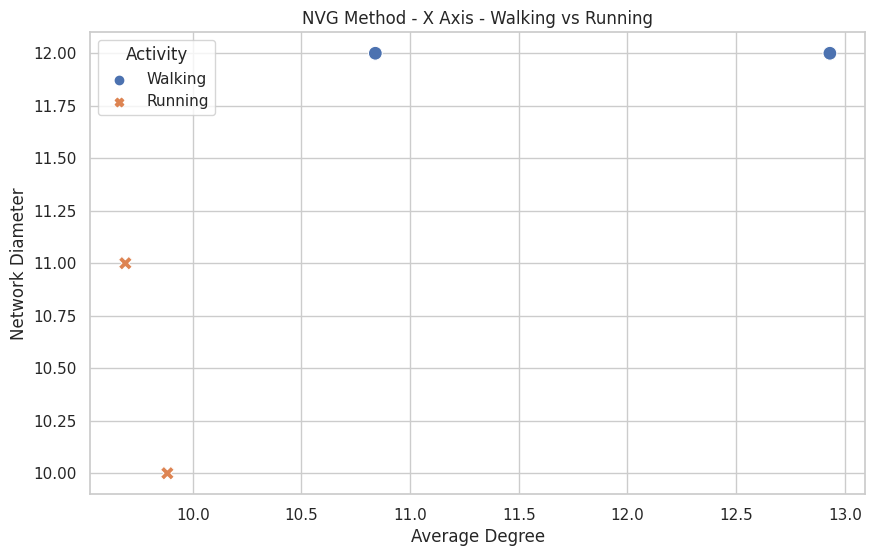

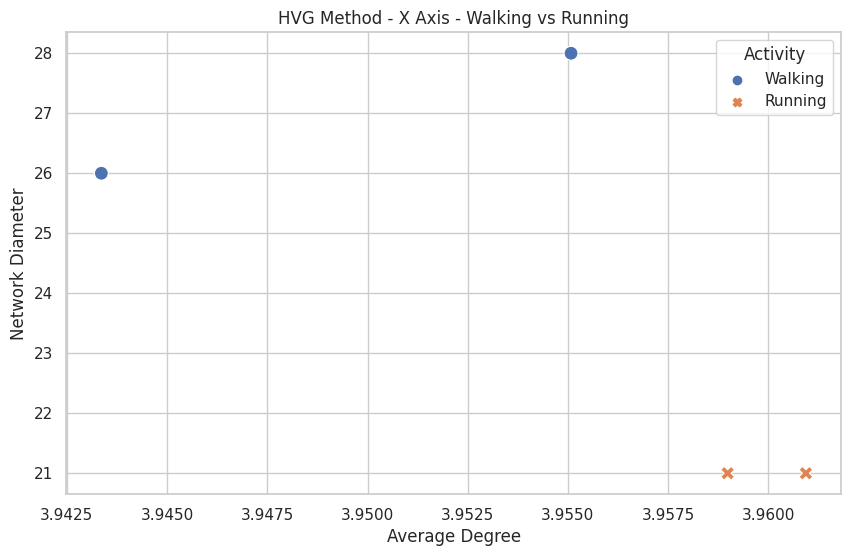

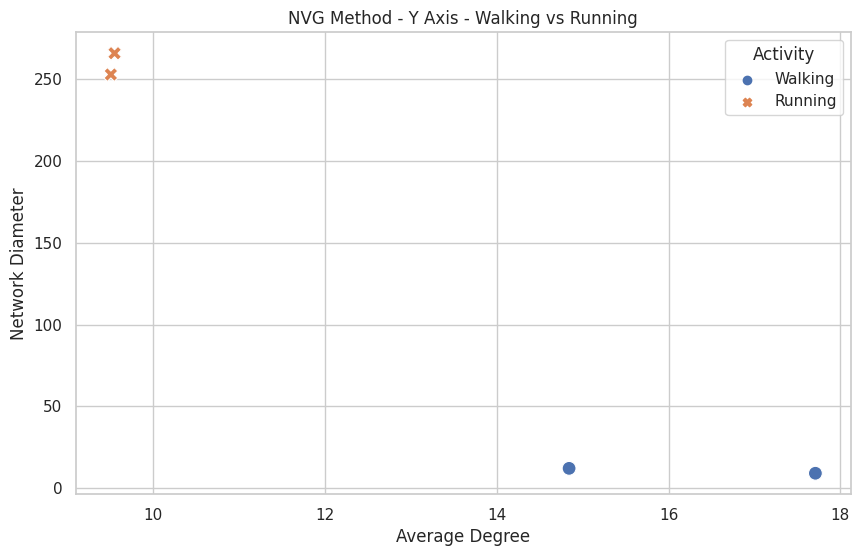

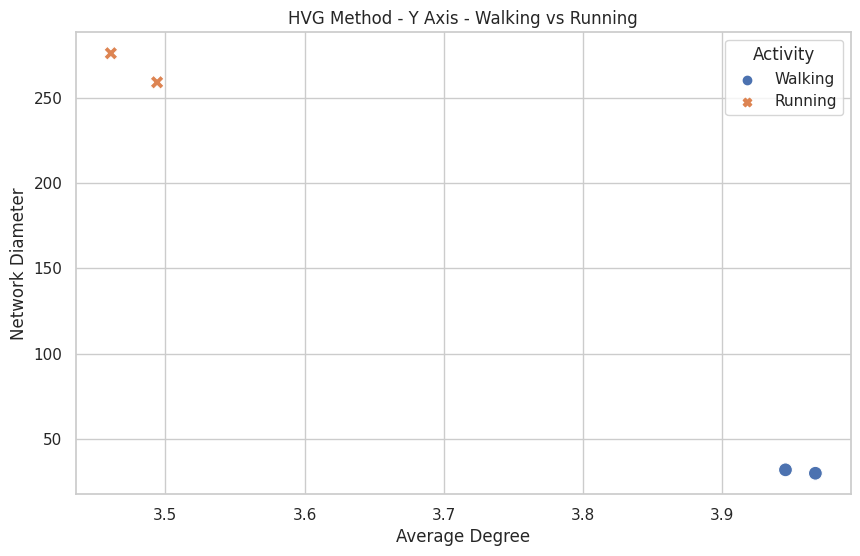

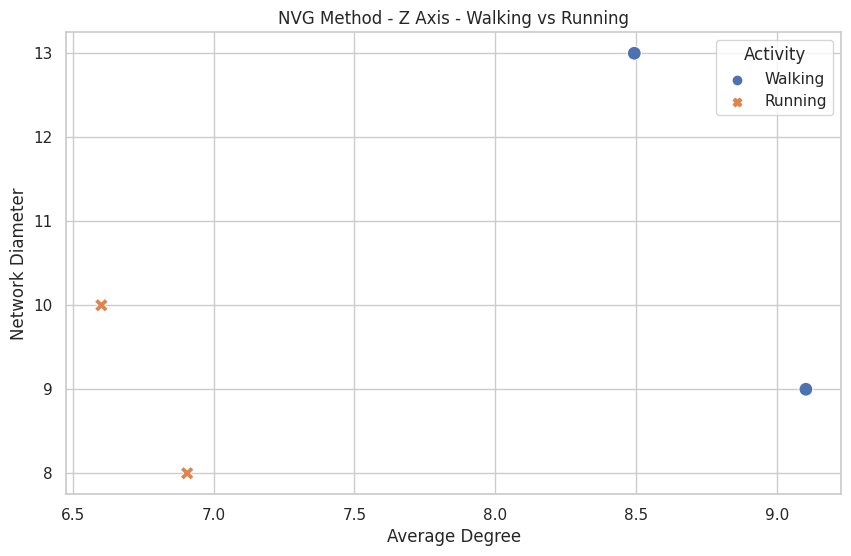

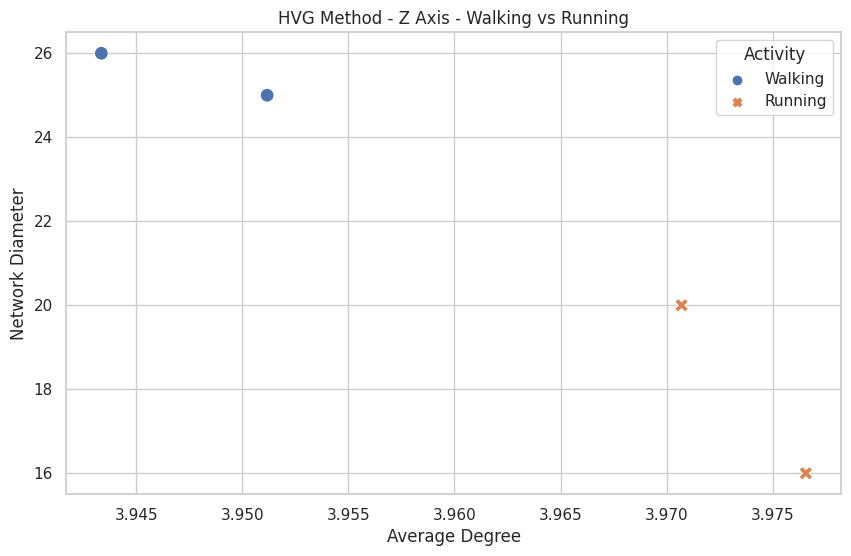

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# setting the scatter plot with a white background
sns.set(style="whitegrid")

for axis in ['X', 'Y', 'Z']:
    for method in ['NVG', 'HVG']:
        filtered_data = results_df[(results_df['Accelerometer Axis'] == axis) &
                                   (results_df['Method'] == method) &
                                   (results_df['Activity'].isin(['Walking', 'Running']))]

        # creating the scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=filtered_data,
                        x='Average Degree',
                        y='Network Diameter',
                        hue='Activity',
                        style='Activity',
                        s=100)

        # setting up the title and the axes for the plot
        plt.title(f'{method} Method - {axis} Axis - Walking vs Running')
        plt.xlabel('Average Degree')
        plt.ylabel('Network Diameter')
        plt.legend(title='Activity')
        plt.show()



#### Insights

This figure presents the relationship between average degree and network diameter for different accelerometer axes (X, Y, Z), different methods (NVG and HVG), and different activities (walking and running).

Average Degree: This represents the average number of nodes connected to each node in the network. A higher average degree may mean that the network is denser or more connected.

Network Diameter: This is the length of the shortest path between the two farthest nodes in the network. A smaller network diameter usually means that the network is tighter or easier to transfer information.



Plot1.The walking data points have higher average degree and network diameter, which may hint at larger node connections and information transfer on the X-axis in the walking state. The Running data points, on the other hand, show slightly lower network characteristics, which may indicate the trend of more compact node connections and more efficient information transfer on the X-axis in the running state.

Plot2.Under the HVG method, the data points for the network diameter are roughly between 3.9585 and 3.9610 for the Running activity on the X-axis, while the data points for the Walking activity are between 3.947 and 3.955. This implies that on the X-axis, the Running activity shows a more stable network diameter, tending to smaller values, while the Walking activity shows a relatively larger network diameter.

Plot3.On the Y-axis with NVG, there is a clear difference between the Walking and Running data points. The running data points show a higher network diameter, which may hint at poorer network connectivity in the running state under this condition. While the data points of walking are on the same axis, the network structure in walking state is more compact and more efficient.

Plot4.These differences may reflect differences in body movement patterns between walking and running states. While walking, the direction may change more frequently, so the network structure is more compact. On the other hand, when running, it may move more rapidly, resulting in more scattered connections between nodes.

Plot5.The walking data points show a relatively high average degree and a large network diameter. This may mean that in the walking state, connectivity on the z-axis is higher, but information is transmitted over a longer distance. The running data points show a lower average degree and a smaller network diameter. This may hint at lower connectivity along the z-axis in the running state, but information is transmitted closer together.

Plot6.Under HVG, the data points of running activity show a lower Network Diameter value than the data points of walking activity. This may mean that the network formed by the running activity is more compact and efficient under the HVG method.

#### Task 1.6: Generate scatter plots of average degree vs network diameter and color the points according to climbing up and climbing down (do this for each accelerometer signal and each method (NVG and HVG)

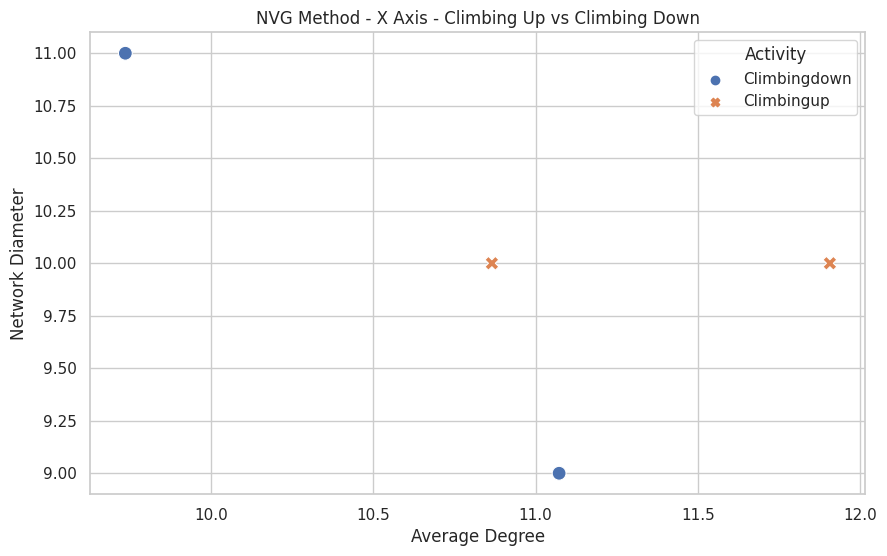

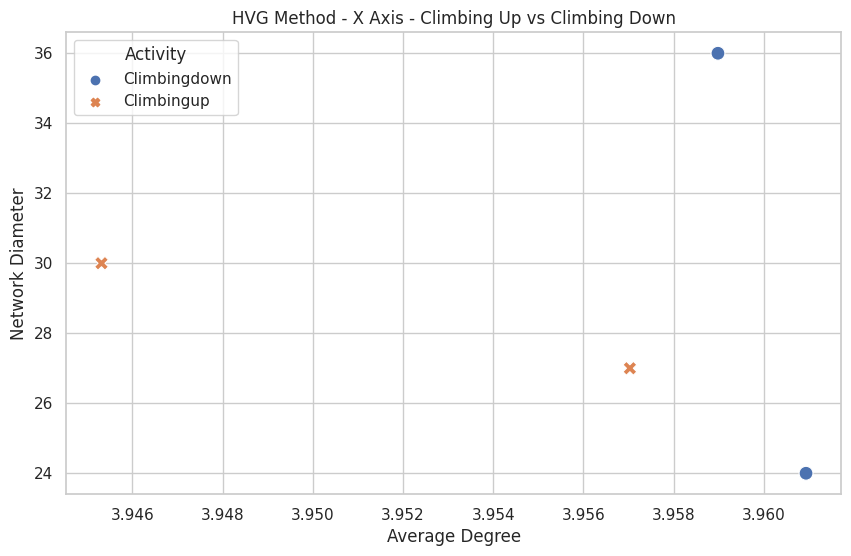

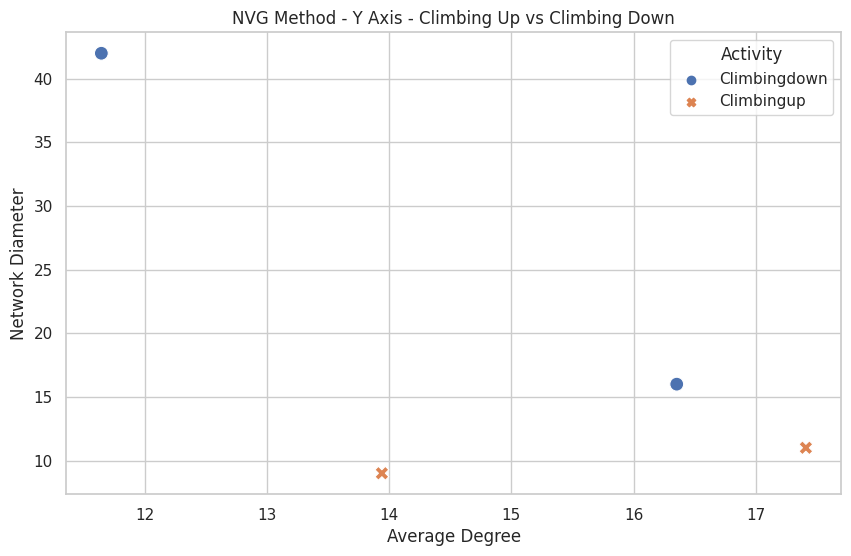

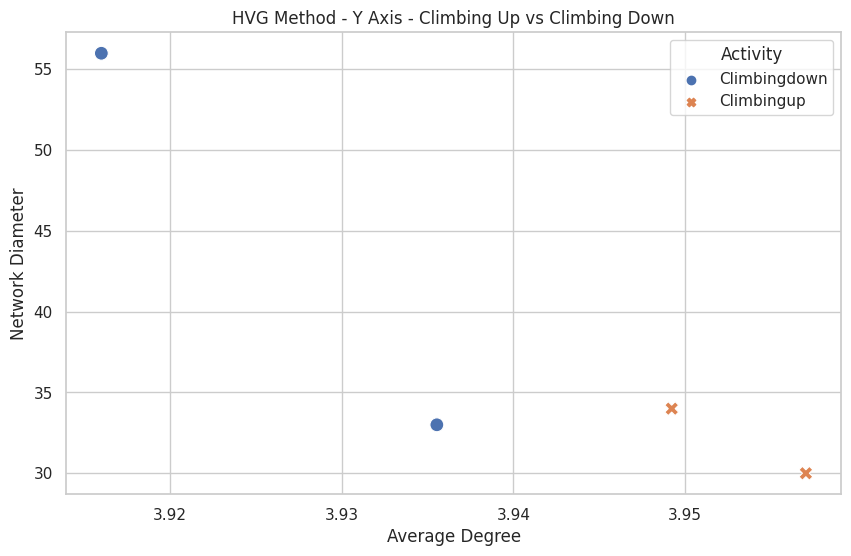

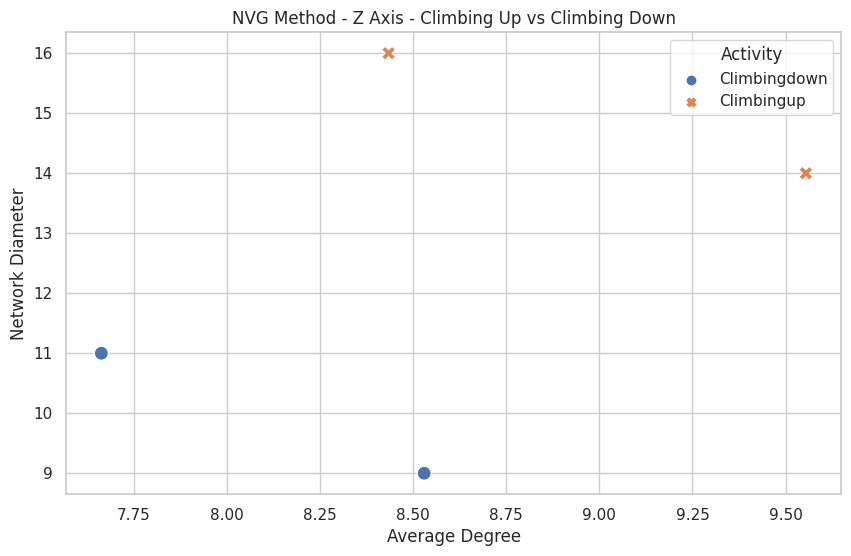

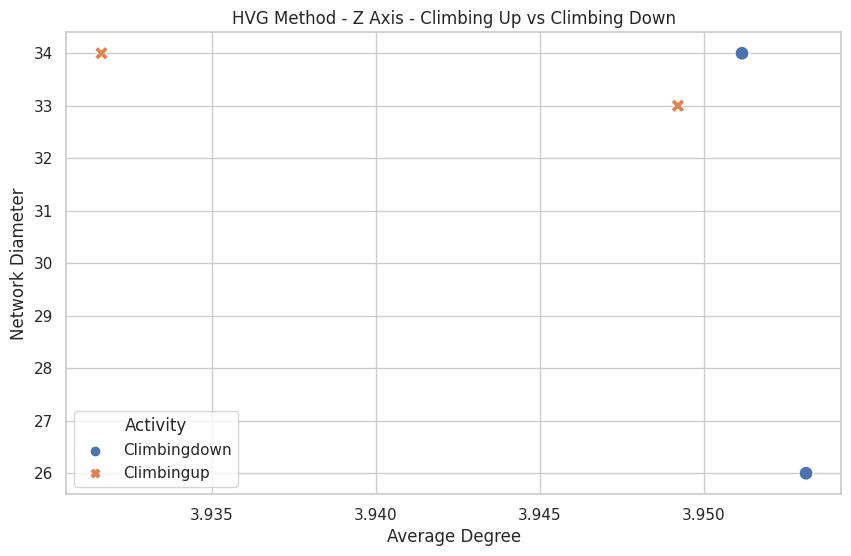

In [40]:
# setting up the white background for the scatter plot
sns.set(style="whitegrid")

for axis in ['X', 'Y', 'Z']:
    for method in ['NVG', 'HVG']:
        filtered_data = results_df[(results_df['Accelerometer Axis'] == axis) &
                                   (results_df['Method'] == method) &
                                   (results_df['Activity'].isin(['Climbingup', 'Climbingdown']))]

        # creating the scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=filtered_data,
                        x='Average Degree',
                        y='Network Diameter',
                        hue='Activity',
                        style='Activity',
                        s=100)

        # setting up the title and axes for the plot
        plt.title(f'{method} Method - {axis} Axis - Climbing Up vs Climbing Down')
        plt.xlabel('Average Degree')
        plt.ylabel('Network Diameter')
        plt.legend(title='Activity')
        plt.show()


#### Insights:

Plot1.Under the NVG method, the X-axis accelerometer seems to present some regularities with climbing and descending movements. For climbing, the data points have a higher Average Degree, while for descending, the data points may have a larger Network Diameter.

Plot2.On the climb up, the diameter of the network is relatively small (~ 30), while the average degree is around 3.95. On the descent of the climb, the diameter of the network increases significantly (~ 36) while the average degree decreases to ~ 3.96. This may mean that the nodes are further apart during climbing descent, but the network structure may be more connected.

Plot3.Under the NVG approach, two sets of data points, climbing up and climbing down, are observed on the Y-axis. It is worth noting that the data points corresponding to the climbing activity exhibit lower average degree and smaller network diameter, while the data points corresponding to the descending activity exhibit higher average degree and larger network diameter.

Plot4.It can be observed that the average degree is higher and the network diameter is larger in the climbing down state, which may imply that the connections between nodes are more extensive but the information transmission path is longer in this action state.
In contrast, in the climbing ascent state, the average degree is low but the network diameter is relatively small, which may mean that although there are fewer connections between nodes, the information transfer path is short.

Plot5.The differences in network characteristics corresponding to climbing up and climbing down activities in the z-axis may reflect differences in body movements in these two movement directions. Climbing up may involve more body movement and connections and thus show higher network degree and larger network diameter, whereas climbing down may involve fewer connections and thus show lower network degree and smaller network diameter.

Plot6.On the z-axis, different network characteristics are observed for climbing and falling activities. For example, climbing activities present higher values on these data points of average degree and network diameter, while descending activities may show different network characteristics.

# Task 2:

In [53]:
# Loading of the dataset

US_report_2020 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project - 2/2020_US_Region_Mobility_Report.csv', low_memory=False)
US_report_2021 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project - 2/2021_US_Region_Mobility_Report.csv', low_memory=False)
US_report_2022 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project - 2/2022_US_Region_Mobility_Report.csv', low_memory=False)

#### Task 2.1: Put together your entire time series using all the data from 2020-2022. You should end up with 1 dataframe that contains all the data points

In [54]:
# Combining the three DataFrames into one
us_mobility_data = pd.concat([US_report_2020, US_report_2021, US_report_2022], ignore_index=True)

# Assume df is your DataFrame
us_mobility_data_copy = us_mobility_data.copy()


In [55]:
#Catagorizing the table based on 'King County' region
us_mobility_data_copy = us_mobility_data[us_mobility_data['sub_region_2'] == 'King County']
display(us_mobility_data_copy.head())

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
765150,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0
765151,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0
765152,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0
765153,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0
765154,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0


In [56]:
us_mobility_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 765150 to 2468874
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 974 non-null    object 
 1   country_region                                      974 non-null    object 
 2   sub_region_1                                        974 non-null    object 
 3   sub_region_2                                        974 non-null    object 
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     0 non-null      object 
 6   census_fips_code                                    974 non-null    float64
 7   place_id                                            974 non-null    object 
 8   date                                                974 non-null    obj

In [57]:
# Assume df is your DataFrame
null_values = us_mobility_data_copy.isnull().sum()

# Display the result
print(null_values)

country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                            0
metro_area                                            974
iso_3166_2_code                                       974
census_fips_code                                        0
place_id                                                0
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64


In [58]:
# Dropping the mentioned columns due to the presence of null values
columns_to_drop = ['iso_3166_2_code', 'metro_area']
us_mobility_data_copy = us_mobility_data_copy.drop(columns=columns_to_drop)
#Dropping the unnecessary columns which are not required.
Unnecessary_columns = ['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline' , 'transit_stations_percent_change_from_baseline']
us_mobility_data_copy = us_mobility_data_copy.drop(columns=Unnecessary_columns)



In [59]:
display(us_mobility_data_copy)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,place_id,date,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
765150,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-15,-2.0,-3.0,0.0
765151,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-16,1.0,-2.0,-1.0
765152,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-17,4.0,-40.0,7.0
765153,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-18,2.0,-8.0,1.0
765154,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-19,2.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2468870,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-11,-10.0,-40.0,9.0
2468871,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-12,-10.0,-41.0,9.0
2468872,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-13,-10.0,-41.0,9.0
2468873,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-14,-9.0,-44.0,9.0


#### Task 2.2: Trim down your time series to remove the months before April 2020. This will remove the very early pandemic and the pre-pandemic conditions

In [60]:
# Convert the 'date' column to datetime format
#us_mobility_data['date'] = pd.to_datetime(us_mobility_data['date'])

# Convert the 'date' column to datetime format and Remove the months before April 2020
us_mobility_data_copy['date'] = pd.to_datetime(us_mobility_data_copy['date'])
us_mobility_data_copy = us_mobility_data_copy[us_mobility_data_copy['date'] >= '2020-04-01']
us_mobility_data_copy = us_mobility_data_copy.reset_index(drop=True)

us_mobility_data_copy.set_index('date', inplace=True)

display(us_mobility_data_copy)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,place_id,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,
2020-04-01,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-20.0,-70.0,29.0
2020-04-02,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-22.0,-70.0,30.0
2020-04-03,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-21.0,-69.0,31.0
2020-04-04,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-24.0,-48.0,17.0
2020-04-05,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-29.0,-48.0,15.0
...,...,...,...,...,...,...,...,...,...
2022-10-11,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-10.0,-40.0,9.0
2022-10-12,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-10.0,-41.0,9.0
2022-10-13,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-10.0,-41.0,9.0


#### Task 2.3: For each of the 3 time series, perform an additive Time Series Decomposition and plot the results. You should show the trend, seasonality, and remainder in your plots

In [61]:

regions_of_interest = ['residential', 'workplaces', 'grocery_and_pharmacy']

# Set common subplot layout and suptitle
plt.figure(figsize=(16, 10))

for i, region in enumerate(regions_of_interest, 1):
    region_column = f'{region.lower().replace(" ", "_")}_percent_change_from_baseline'

    # Extract relevant columns
    #region_df = us_mobility_data_copy[['date', region_column]].set_index('date')
    
    result = seasonal_decompose(us_mobility_data_copy[region_column], model='additive')

    # Create Plotly figure for decomposition
    fig = go.Figure()

    # Add trend component
    fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines', name='Trend'))

    # Add seasonality component
    fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines', name='Seasonality'))

    # Add remainder component
    fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, mode='lines', name='Remainder'))

    # Update layout
    fig.update_layout(title=f'Time Series Decomposition - {region_column}', xaxis_title='Date', yaxis_title='Value')
    fig.show()


<Figure size 1600x1000 with 0 Axes>

#### Task 2.4: For each time series, build a forecasting model using Exponential Smoothing (ES). You should test out at least 2 different ES models and use forecast evaluation metrics (e.g. MAE, RMSE) to demonstrate why you chose your best ES mode

In [24]:

#Creating a definition to split a time series into training and testing sets
def train_test_split(y, train_size):
    train, test = y[:train_size], y[train_size:]
    return train, test
#Creating a definition to evaluate the performance to get MAE and RMSE values
def evaluate_model(test, forecast):
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return mae, rmse

def ploting_results(train, test, forecast_ses, forecast_hw, column):
    fig = go.Figure()

    # Training Data
    fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Training Data'))

    # Test Data
    fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Test Data'))

    # Soft Exponential Smoothing Forecast
    fig.add_trace(go.Scatter(x=test.index, y=forecast_ses, mode='lines', name='SES Forecast'))

    # Holt-Winters Forecast
    fig.add_trace(go.Scatter(x=test.index, y=forecast_hw, mode='lines', name='Holt-Winters Forecast'))

    # Updating layout
    fig.update_layout(title=f'Forecasting of Time Series- {column}', xaxis_title='Date', yaxis_title='Value')
    fig.show()
# definition for choosing the best model
def choosing_best_model(mae_ses, mae_hw, column):
    best_model = 'SES' if mae_ses < mae_hw else 'Holt-Winters'
    print(f"The best model for {column} is: {best_model}\n")

# List of time series columns
time_series_columns = ['grocery_and_pharmacy_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']

# Train-test split (you can adjust the split point as needed)
train_size = int(len(us_mobility_data_copy) * 0.8)

# Iterate over each time series column
for column in time_series_columns:
    # Select the time series column
    y = us_mobility_data_copy[column]

    # Train-test split
    train, test = train_test_split(y, train_size)

    # Model 1: Simple Exponential Smoothing (SES)
    model_ses = ExponentialSmoothing(train, trend='add', seasonal=None)
    fit_ses = model_ses.fit()
    forecast_ses = fit_ses.forecast(len(test))

    # Model 2: Holt-Winters Exponential Smoothing (Holt-Winters)
    model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
    fit_hw = model_hw.fit()
    forecast_hw = fit_hw.forecast(len(test))

    # Evaluate models
    mae_ses, rmse_ses = evaluate_model(test, forecast_ses)
    mae_hw, rmse_hw = evaluate_model(test, forecast_hw)

    # Print evaluation metrics
    print(f"\nTime Series - {column}")
    print(f"SES MAE: {mae_ses:.2f}, RMSE: {rmse_ses:.2f}")
    print(f"Holt-Winters MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")

    # Plot the results using Plotly
    ploting_results(train, test, forecast_ses, forecast_hw, column)

    # Choose the best model based on evaluation metrics
    choosing_best_model(mae_ses, mae_hw, column)



Time Series - grocery_and_pharmacy_percent_change_from_baseline
SES MAE: 5.37, RMSE: 6.03
Holt-Winters MAE: 5.50, RMSE: 6.20


The best model for grocery_and_pharmacy_percent_change_from_baseline is: SES


Time Series - workplaces_percent_change_from_baseline
SES MAE: 16.44, RMSE: 17.70
Holt-Winters MAE: 17.10, RMSE: 18.74


The best model for workplaces_percent_change_from_baseline is: SES


Time Series - residential_percent_change_from_baseline
SES MAE: 9.14, RMSE: 10.60
Holt-Winters MAE: 9.16, RMSE: 10.63


The best model for residential_percent_change_from_baseline is: SES



#### Task 2.5: For each time series, build a forecasting model using ARIMA. You must show why you chose your ARIMA model

In [26]:

#defining a function to find the best order
def find_best_arima_order(y):
    best_aic = np.inf
    best_order = None
    
    p = d = q = range(0, 5)
    pdq = list(itertools.product(p, d, q))

    for param in pdq:
        try:
            model_arima = sm.tsa.ARIMA(y, order=param)
            model_arima_fit = model_arima.fit()
            aic = model_arima_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = param
        except Exception as e:
            print(f"Failed for {param}: {e}")
            continue
    
    return best_order, best_aic

best_orders = {}

for column in time_series_columns:
    print(f"Finding best ARIMA order for {column}")
    
    y = us_mobility_data_copy[column]
    
    best_order, best_aic = find_best_arima_order(y)
    
    best_orders[column] = best_order
    print(f"Best ARIMA Model Order for {column}: {best_order} (AIC: {best_aic})")

# Print Best Model Orders
print("\nBest ARIMA Model Orders:")
for column, order in best_orders.items():
    print(f"{column}: {order}")


Finding best ARIMA order for grocery_and_pharmacy_percent_change_from_baseline
Best ARIMA Model Order for grocery_and_pharmacy_percent_change_from_baseline: (4, 3, 2) (AIC: 14.0)
Finding best ARIMA order for workplaces_percent_change_from_baseline
Best ARIMA Model Order for workplaces_percent_change_from_baseline: (4, 0, 4) (AIC: 6678.173091037616)
Finding best ARIMA order for residential_percent_change_from_baseline
Best ARIMA Model Order for residential_percent_change_from_baseline: (4, 1, 4) (AIC: 4125.166001301649)

Best ARIMA Model Orders:
grocery_and_pharmacy_percent_change_from_baseline: (4, 3, 2)
workplaces_percent_change_from_baseline: (4, 0, 4)
residential_percent_change_from_baseline: (4, 1, 4)




ADF Statistic: -2.609969597393196, p-value: 0.09095421120458902
The series is not stationary. Applying differencing...


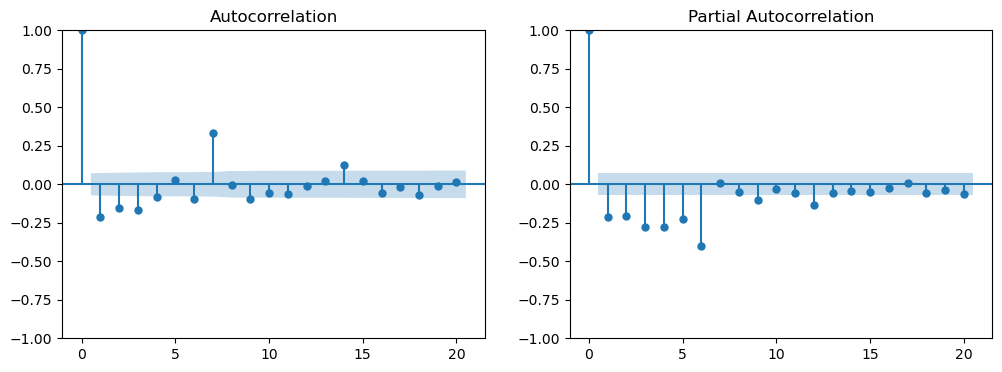


Time Series - grocery_and_pharmacy_percent_change_from_baseline
ARIMA MAE: 9.35, RMSE: 10.14




ADF Statistic: -3.260853797096699, p-value: 0.016721602304220127
The series is stationary.


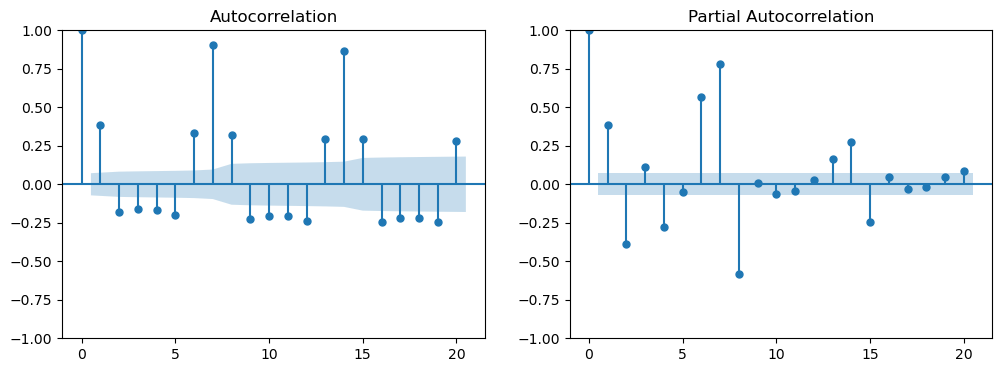


Time Series - workplaces_percent_change_from_baseline
ARIMA MAE: 8.81, RMSE: 10.80




ADF Statistic: -2.4518282416425845, p-value: 0.12763912938564714
The series is not stationary. Applying differencing...


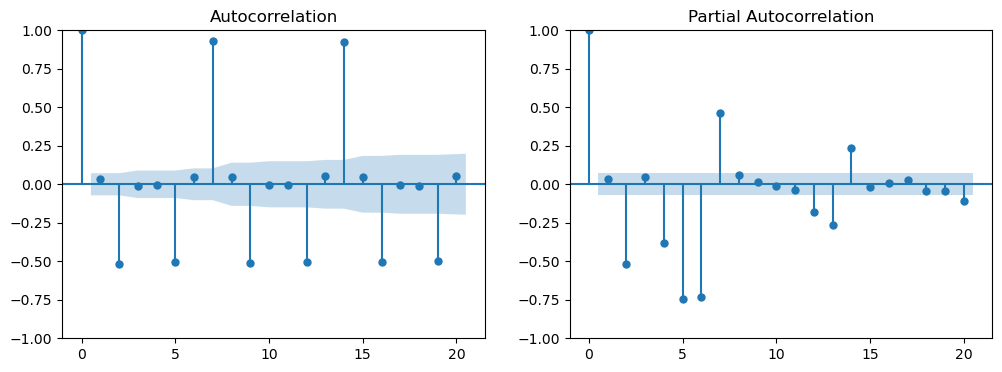


Time Series - residential_percent_change_from_baseline
ARIMA MAE: 1.89, RMSE: 2.54


In [29]:
#Building a forecasting model using ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Best ARIMA orders
arima_orders = {
    'grocery_and_pharmacy_percent_change_from_baseline': (4, 3, 2),
    'workplaces_percent_change_from_baseline': (4, 0, 4),
    'residential_percent_change_from_baseline': (4, 1, 4)
}

for column in time_series_columns:
    # Select the time series column
    y = us_mobility_data_copy[column]

    # Train-test split
    train, test = y[:train_size], y[train_size:]

    # Check stationarity using Augmented Dickey-Fuller test
    result_adf = adfuller(train)
    print(f'\n\nADF Statistic: {result_adf[0]}, p-value: {result_adf[1]}')
    
    # Ensure stationarity through differencing
    if result_adf[1] > 0.05:
        print('The series is not stationary. Applying differencing...')
        train_diff = train.diff().dropna()
    else:
        print('The series is stationary.')
        train_diff = train

    # Plot ACF and PACF to determine ARIMA parameters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(train_diff, lags=20, ax=ax1)
    plot_pacf(train_diff, lags=20, ax=ax2)
    plt.show()

    # Choosing p, d, and q based on ACF and PACF plots
    # For simplicity, you can manually interpret these plots and set the orders
    # Alternatively, you can use an automated approach like grid search

    # Build ARIMA model
    p, d, q = arima_orders[column]
    model = ARIMA(train, order=(p, d, q))
    fit_arima = model.fit()

    # Forecast using ARIMA model
    forecast_arima = fit_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

    # Evaluate the model
    mae_arima = mean_absolute_error(test, forecast_arima)
    rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))

    # Print evaluation metrics
    print(f"\nTime Series - {column}")
    print(f"ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

    # Plot the results using Plotly
    fig = go.Figure()

    # Training Data
    fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Training Data'))

    # Test Data
    fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Test Data'))

    # ARIMA Forecast
    fig.add_trace(go.Scatter(x=test.index, y=forecast_arima, mode='lines', name='ARIMA Forecast'))

    # Update layout
    fig.update_layout(title=f'Time Series Forecasting - {column}', xaxis_title='Date', yaxis_title='Value')
    fig.show()


#### Task 2.6: Compare your best ES and best ARIMA models for each time series using forecast evaluation metrics. Show which model is best in each case

We can able to find out the best model between ES and ARIMA by comparing the MAE and RMSE values, and the ones having a lower value would be considered as the best model in each case.

#### For grocery_and_pharmacy_percent_change_from_baseline timeseries

SES MAE: 5.37, RMSE: 6.03 Holt-Winters MAE: 5.50, RMSE: 6.20 ARIMA MAE: 9.35, RMSE: 10.14 ||| Conclusion: Comparing all the values, it can be found that SES and Holt-Winters are almost the same and is way better than ARIMA model for the grocery_and_pharmacy_percent_change_from_baseline timeseries

#### For workplaces_percent_change_from_baseline timeseries

SES MAE: 5.37, RMSE: 6.03 Holt-Winters MAE: 5.50, RMSE: 6.20 ARIMA MAE: 9.35, RMSE: 10.14 ||| Conclusion: Comparing all the values, it can be found that SES and Holt-Winters are almost the same and is way better than ARIMA model for the grocery_and_pharmacy_percent_change_from_baseline timeseries

#### For residential_percent_change_from_baseline Timeseries


SES MAE: 9.14, RMSE: 10.60
Holt-Winters MAE: 9.16, RMSE: 10.63
ARIMA MAE: 1.89, RMSE: 2.54
|||
Conclusion: When Comparing all the necessary values, it can be found that ARIMA performs much better than SES and Holt-Winters and hence can be considered as the best model for the residential_percent_change_from_baseline timeseries

#### Task 2.7: Using your best model, forecast the rest of 2022 for each time series. Show these forecasts by plotting the past data points in 1 color and the future data points in a second color

In [62]:
us_mobility_data_copy.reset_index(inplace=True)

# Assuming your dataframe is named df and has the necessary columns including 'date'
# Also, make sure the 'date' column is in datetime format
us_mobility_data_copy['date'] = pd.to_datetime(us_mobility_data_copy['date'])

# ARIMA orders and best model information from Task 2.5
arima_orders = {
    'workplaces_percent_change_from_baseline': (4, 0, 4),
    'residential_percent_change_from_baseline': (4, 1, 4)
}

best_models = {
    'grocery_and_pharmacy_percent_change_from_baseline': 'SES',  # or 'Holt-Winters'
    'workplaces_percent_change_from_baseline': 'ARIMA',
    'residential_percent_change_from_baseline': 'ARIMA'
}

# Loop through each time series column
for column, best_model in best_models.items():
    # Extract the time series data
    y = us_mobility_data_copy.set_index('date')[column]

    # Forecast the remaining data for 2022 based on the best model
    if best_model == 'ARIMA':
        best_order = arima_orders[column]
        model_arima = sm.tsa.ARIMA(y, order=best_order)
        model_arima_fit = model_arima.fit()
        forecast_index = pd.date_range(start=y.index.max() + pd.Timedelta(days=1), end='2022-12-31', freq='D')
        forecast = model_arima_fit.forecast(steps=len(forecast_index))
    else:
        # Assuming SES/Holt-Winters
        model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12)
        fit = model.fit()
        forecast_index = pd.date_range(start=y.index.max() + pd.Timedelta(days=1), end='2022-12-31', freq='D')
        forecast = fit.forecast(steps=len(forecast_index))

    # Plot past and future data points using Plotly
    fig = go.Figure()

    # Past Data
    fig.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name='Past Data', line=dict(color='blue')))

    # Forecast
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast', line=dict(color='green')))

    # Update layout
    fig.update_layout(title=f'{column} Forecast for the Rest of 2022', xaxis_title='Date', yaxis_title='Value')
    fig.show()
